# Attitude estimation

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import matplotlib.pyplot as plt

from helpers import IMU, plot_compare

In this exercise you will use measurements of the drone's attitude and body rates from the IMU to estimate the state of the drone. The state and measurements are given by:

$$
\begin{align}
x_t= \begin{bmatrix} \theta \\ \phi \end{bmatrix} && z_t =\begin{bmatrix} \theta \\ \phi \\ q \\ p  \end{bmatrix}
\end{align}
$$

For this exercise, we will assume that the drone's attitude is close to hover, allowing us to assume that the rotational rates in the body frame are the same as in the global frame. 

$$
\dot{\theta} = q \\
\dot{\phi} = p
$$

For larger angles, you would have to use a transformation matrix which was covered in a previous lesson.

The equations which describe the attitude update are as follows:

$$
\hat{\theta}_t = \frac{\tau}{\tau + dt}\left( \hat{\theta}_{t-1} +  z_{t,\dot{\theta}} \times dt\right) + \frac{dt}{\tau + dt} z_{t,\theta} \\ 
\hat{\phi}_t = \frac{\tau}{\tau + dt}\left( \hat{\phi}_{t-1} +  z_{t,\dot{\phi}} \times dt\right) + \frac{dt}{\tau + dt} z_{t,\phi}
$$

In [2]:
class ComplementaryFilter:
    def __init__(self,dt,tau): 
        self.dt = dt
        self.tau = tau
        self.estimated_theta = 0.0
        self.estimated_phi   = 0.0
        
    def update(self,z):
        t1 = (self.tau / self.tau + self.dt)
        t2 = (self.dt / self.tau + self.dt)
        self.estimated_theta = t1 * (self.estimated_theta + z[2] * self.dt) + (t2 * z[0])
        self.estimated_phi = t1 * (self.estimated_theta + z[3] * self.dt) + (t2 * z[1]) 
            
    def make_estimates(self,measurements):
        self.estimated_theta = 0.0
        self.estimated_phi = 0.0
        estimates = np.zeros((2, measurements.shape[1]))
        for i in range(measurements.shape[1]):
            z = measurements[:,i]
            self.update(z)
            est = np.array([self.estimated_theta, self.estimated_phi])
            estimates[:,i] = est
        return estimates

In [3]:
# drone hovers for all N measurements 
N = 2000 
true_values = np.zeros((4, N))

# simulate sensor measurements
imu = IMU()
measurements = imu.make_measurements(true_values)

In [4]:
# Parameters for complementary filter
# 
# TODO - try modifying TAU. 
#   What value gives you the best estimate?
#   What do your plots look like when TAU = DT * 100?
#   What about when TAU = DT * 1? 

DT  = 0.01
TAU = DT * 1
cf  = ComplementaryFilter(DT, TAU)

# make estimates based on measurements
estimates = cf.make_estimates(measurements)

# integrating gyro directly
integrated_ests = np.zeros((2,N))
integrated_ests[0,:] = np.cumsum(measurements[2,:]) * DT
integrated_ests[1,:] = np.cumsum(measurements[3,:]) * DT

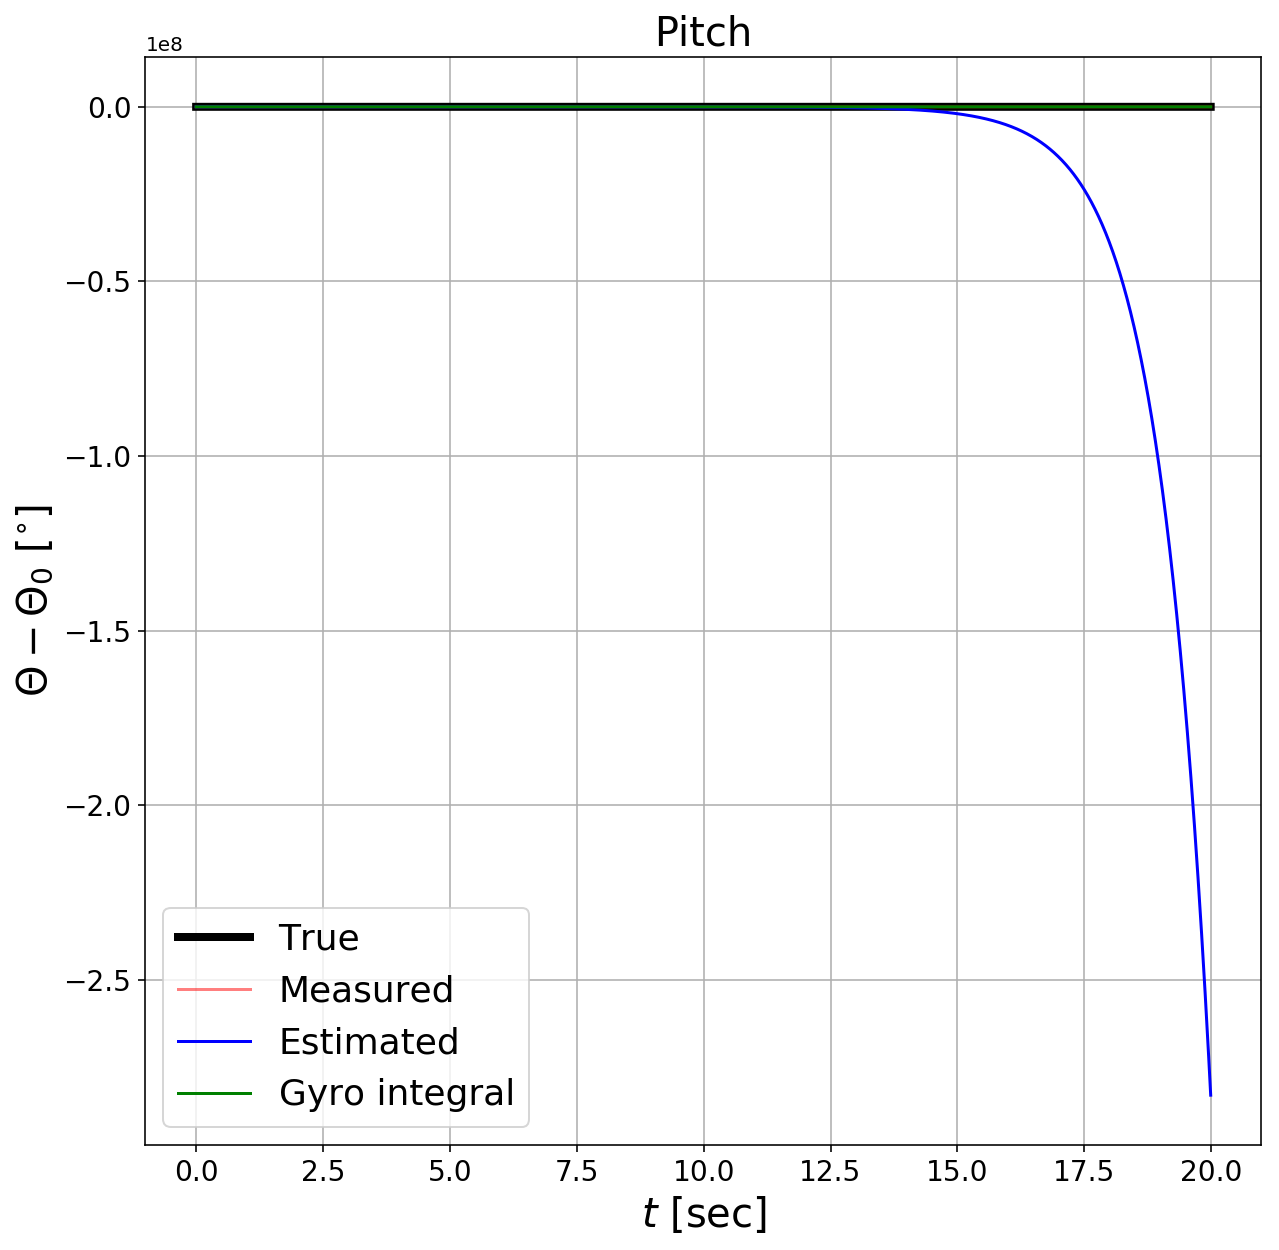

In [5]:
# plot pitch
plot_compare(true_values,estimates,measurements,integrated_ests, DT, 0)

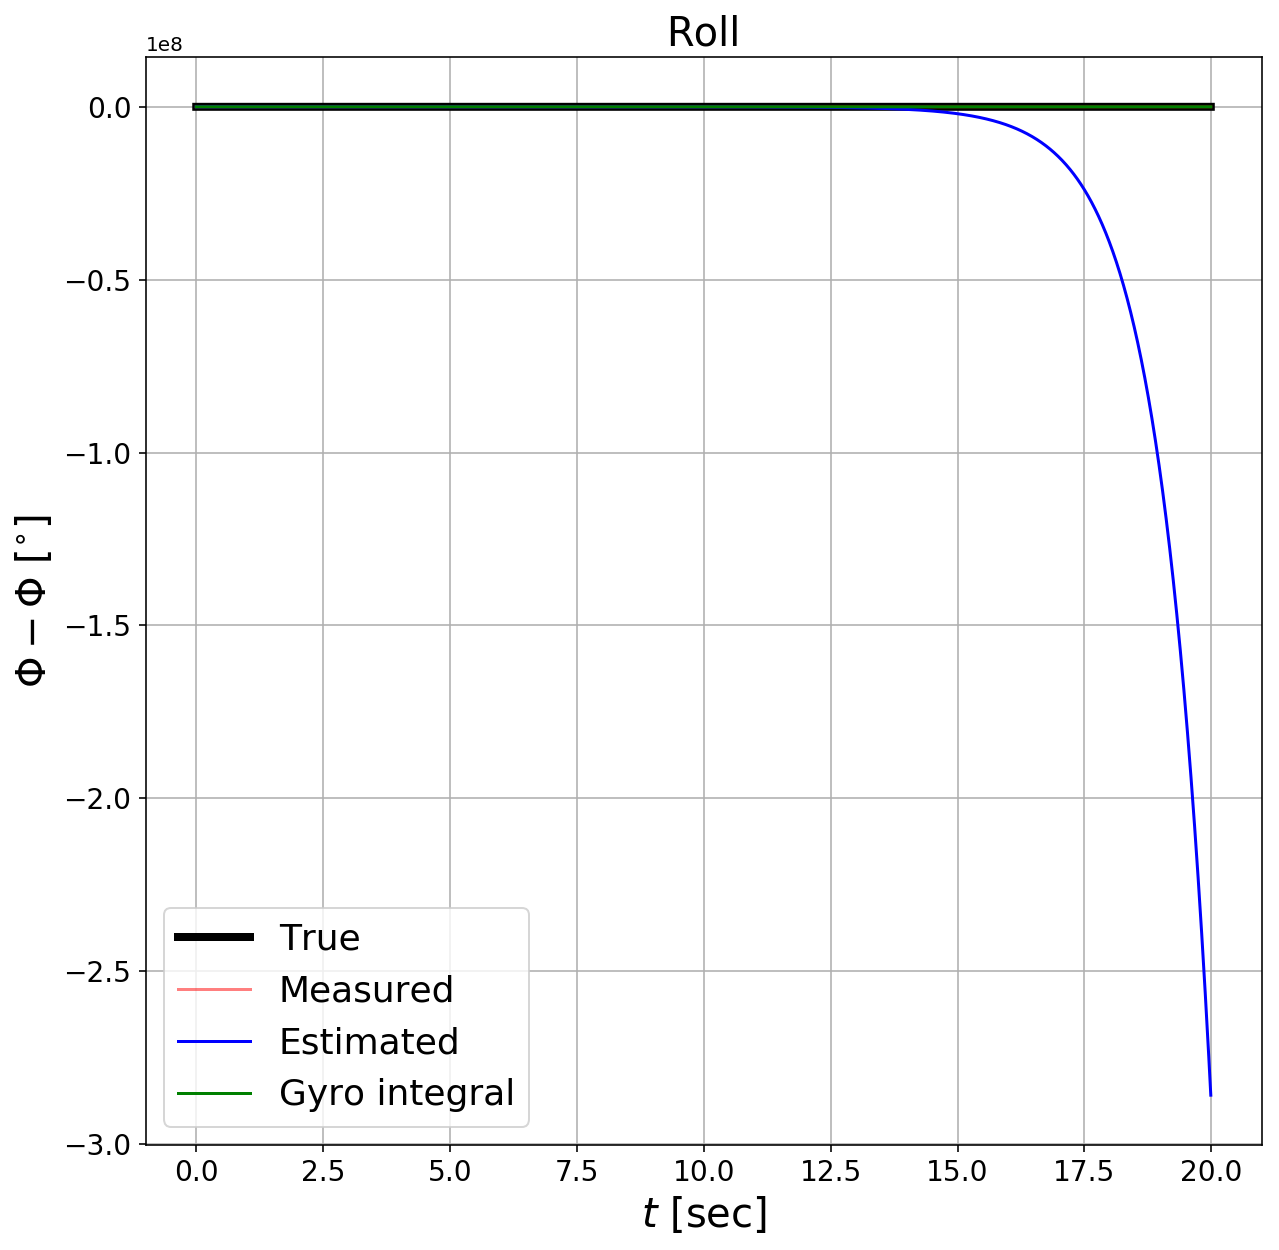

In [6]:
# plot roll
plot_compare(true_values,estimates,measurements,integrated_ests, DT, 1)

[Solution](./Attitude%20estimation-Solution-Revised.ipynb)